In [2]:
# Common
import os
import keras
import numpy as np
from glob import glob 
from tqdm import tqdm 
import tensorflow as tf

# Data
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Viz
import seaborn as sns
import matplotlib.pyplot as plt

# Model 
from keras import Sequential
from keras.layers import GlobalAvgPool2D, Dense, Dropout
from keras.models import load_model

# Pre-Trained Models
from tensorflow.keras.applications import ResNet50, ResNet50V2, InceptionV3, Xception

# Callbacks 
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [5]:
class_names = sorted(os.listdir('dataset/train'))
n_classes = len(class_names)
class_names

['Dark', 'Green', 'Light', 'Medium']

In [7]:
class_dis = [len(glob("dataset/train/" + name + "/*.png")) for name in class_names]
class_dis

[300, 300, 300, 300]

In [8]:
data = pd.read_csv('dataset/Coffee_Bean.csv')
data.head()

,class index,filepaths,labels,data set
0,0,train/Dark/dark (1).png,Dark,train
1,0,train/Dark/dark (10).png,Dark,train
2,0,train/Dark/dark (100).png,Dark,train
3,0,train/Dark/dark (101).png,Dark,train
4,0,train/Dark/dark (102).png,Dark,train


In [12]:


# Initialize Generator
train_gen = ImageDataGenerator(
    rescale=1./255, 
    horizontal_flip=True, 
    rotation_range=20, 
    validation_split=0.2)

test_gen = ImageDataGenerator(rescale=1./255)

# Load Data
path = "dataset/"
train_ds = train_gen.flow_from_directory(path + "train", target_size=(256,256), shuffle=True, batch_size=32, subset="training", class_mode='binary')
valid_ds = train_gen.flow_from_directory(path + "train", target_size=(256,256), shuffle=True, batch_size=32, subset="validation", class_mode='binary')
test_ds = train_gen.flow_from_directory(path + "test", target_size=(256,256), shuffle=True, batch_size=32, class_mode='binary')



Found 960 images belonging to 4 classes.
Found 240 images belonging to 4 classes.
Found 400 images belonging to 4 classes.


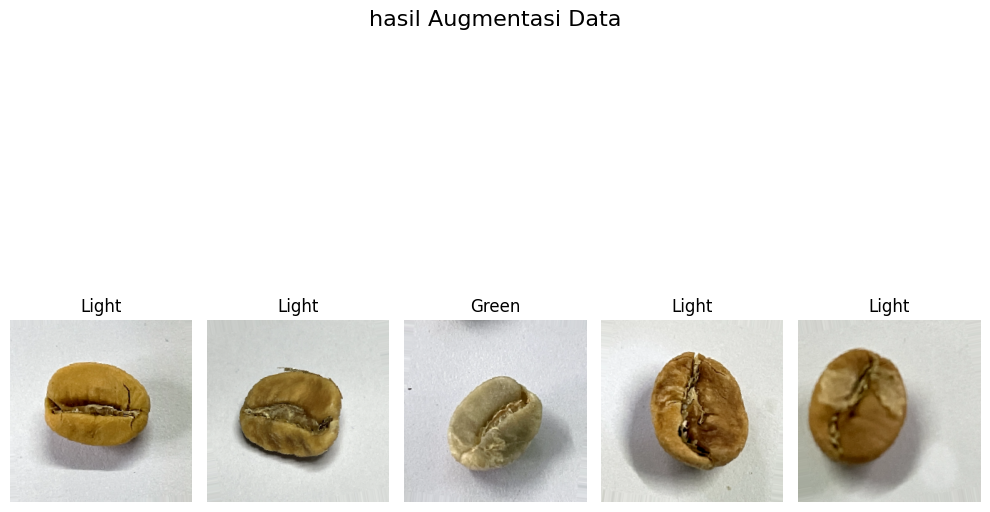

In [19]:
# Visualisasi Augmentasi
plt.figure(figsize=(10, 8))
for images, labels in train_ds:
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(images[i])
        plt.title(class_names[int(labels[i])])
        plt.axis('off')
    break
plt.suptitle("hasil Augmentasi Data", fontsize=16)
plt.tight_layout()
plt.show()

In [13]:


def show_image(img, title=None):
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')



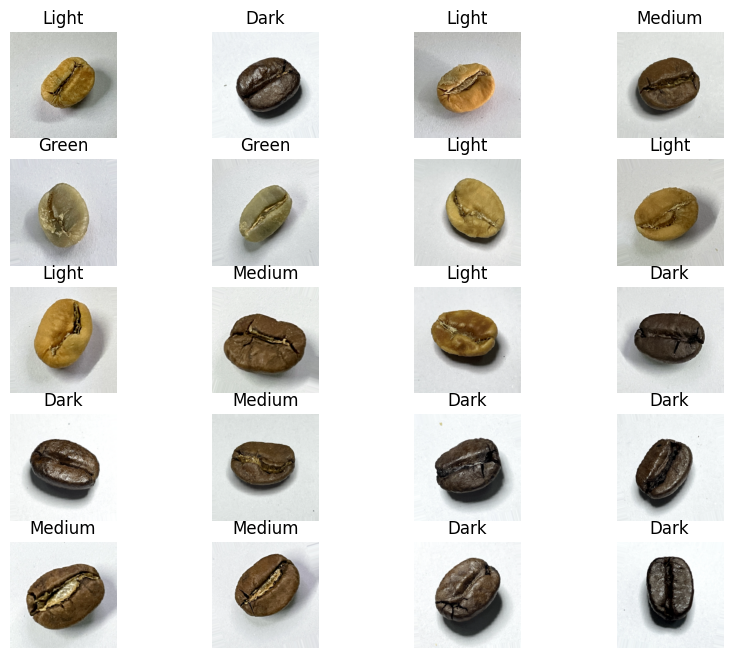

In [14]:
plt.figure(figsize=(10,8))
i=1
for images, labels in iter(train_ds):
    
    id = np.random.randint(len(images))
    image = images[id]
    label = labels[id]

    plt.subplot(5,4,i)
    show_image(image, title=class_names[int(label)])

    i+=1
    if i>=21: break

plt.show()

In [20]:
# Inisialisasi Model
name = "ResNet50V2"
base_model = ResNet50V2(include_top=False, weights='imagenet', input_shape=(256,256,3))
base_model.trainable = False

resnet_50V2 = Sequential([
    base_model, 
    GlobalAvgPool2D(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(n_classes, activation='softmax')
])

resnet_50V2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Callbacks
cbs = [
    EarlyStopping(patience=3, restore_best_weights=True),
    ModelCheckpoint(name + ".keras", save_best_only=True)
]

# Training
history = resnet_50V2.fit(train_ds, validation_data=valid_ds, epochs=50, callbacks=cbs)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.7205 - loss: 0.6891 - val_accuracy: 0.9542 - val_loss: 0.1200
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.9503 - loss: 0.1475 - val_accuracy: 0.9667 - val_loss: 0.1034
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.9548 - loss: 0.1136 - val_accuracy: 0.9625 - val_loss: 0.1176
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.9677 - loss: 0.1000 - val_accuracy: 0.9125 - val_loss: 0.1996
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.9669 - loss: 0.0788 - val_accuracy: 0.9750 - val_loss: 0.0549
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.9766 - loss: 0.0603 - val_accuracy: 0.9667 - val_loss: 0.0767
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.9840 - loss: 0.0585 - val_accuracy: 0.9875 - val_loss: 0.0573
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.9909 - loss: 0.0302 - val_accuracy: 0.9792 - val_loss:

In [ ]:
# from keras.models import load_model

# # Load model terbaik hasil training sebelumnya
# model_path = name + ".keras"
# resnet_50V2 = load_model(model_path)

# # Lanjutkan training dari model terbaik
# resnet_50V2.fit(
#     train_ds,
#     validation_data=valid_ds,
#     epochs=30,  # jumlah total epoch lanjutan, bisa disesuaikan
#     callbacks=[
#         EarlyStopping(patience=5, restore_best_weights=True),  # opsi: ubah patience
#         ModelCheckpoint(name + "_continued.keras", save_best_only=True)
#     ]
# )


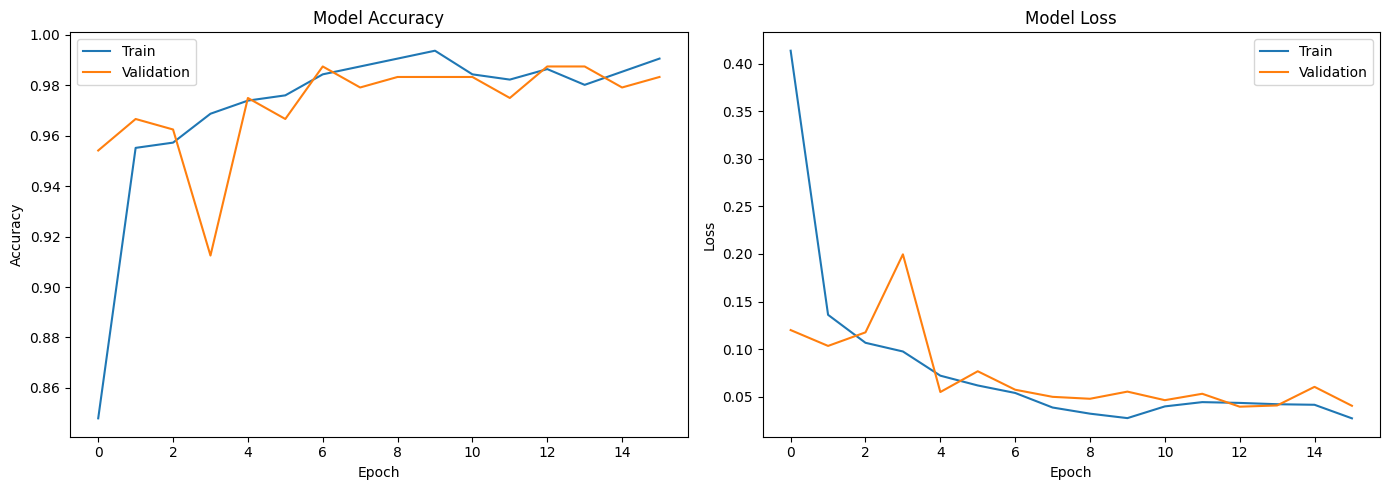

In [21]:
# Plot Akurasi dan Loss
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [22]:
model_path = 'ResNet50V2.keras'
model = load_model(model_path)

In [23]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50v2 (Functional)         │ (None, 8, 8, 2048)     │    23,564,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,141,518 (95.91 MB)

 Trainable params: 525,572 (2.00 MB)

 Non-trainable params: 23,564,800 (89.89 MB)

 Optimizer params: 1,051,146 (4.01 MB)

In [24]:
model.evaluate(test_ds)

13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 956ms/step - accuracy: 0.9927 - loss: 0.0259


[0.018734056502580643, 0.9975000023841858]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 856ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 860ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 833ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 802ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 893ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 896ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 845ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 829ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 882ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 820ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 785ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 779ms/step


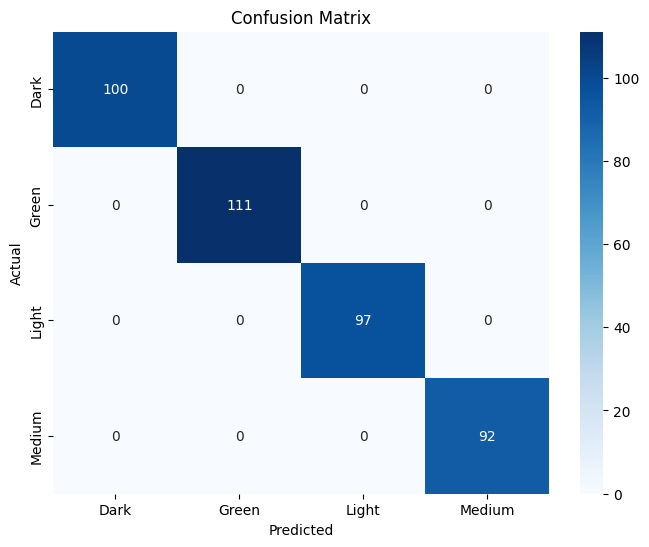

Classification Report:

              precision    recall  f1-score   support

        Dark       1.00      1.00      1.00       100
       Green       1.00      1.00      1.00       111
       Light       1.00      1.00      1.00        97
      Medium       1.00      1.00      1.00        92

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [27]:
from sklearn.metrics import confusion_matrix, classification_report
# Evaluasi dan Confusion Matrix
y_true, y_pred = [], []
for images, labels in test_ds:
    preds = model.predict(images)
    y_true.extend(labels)
    y_pred.extend(np.argmax(preds, axis=1))
    if len(y_true) >= test_ds.samples:
        break

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 974ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


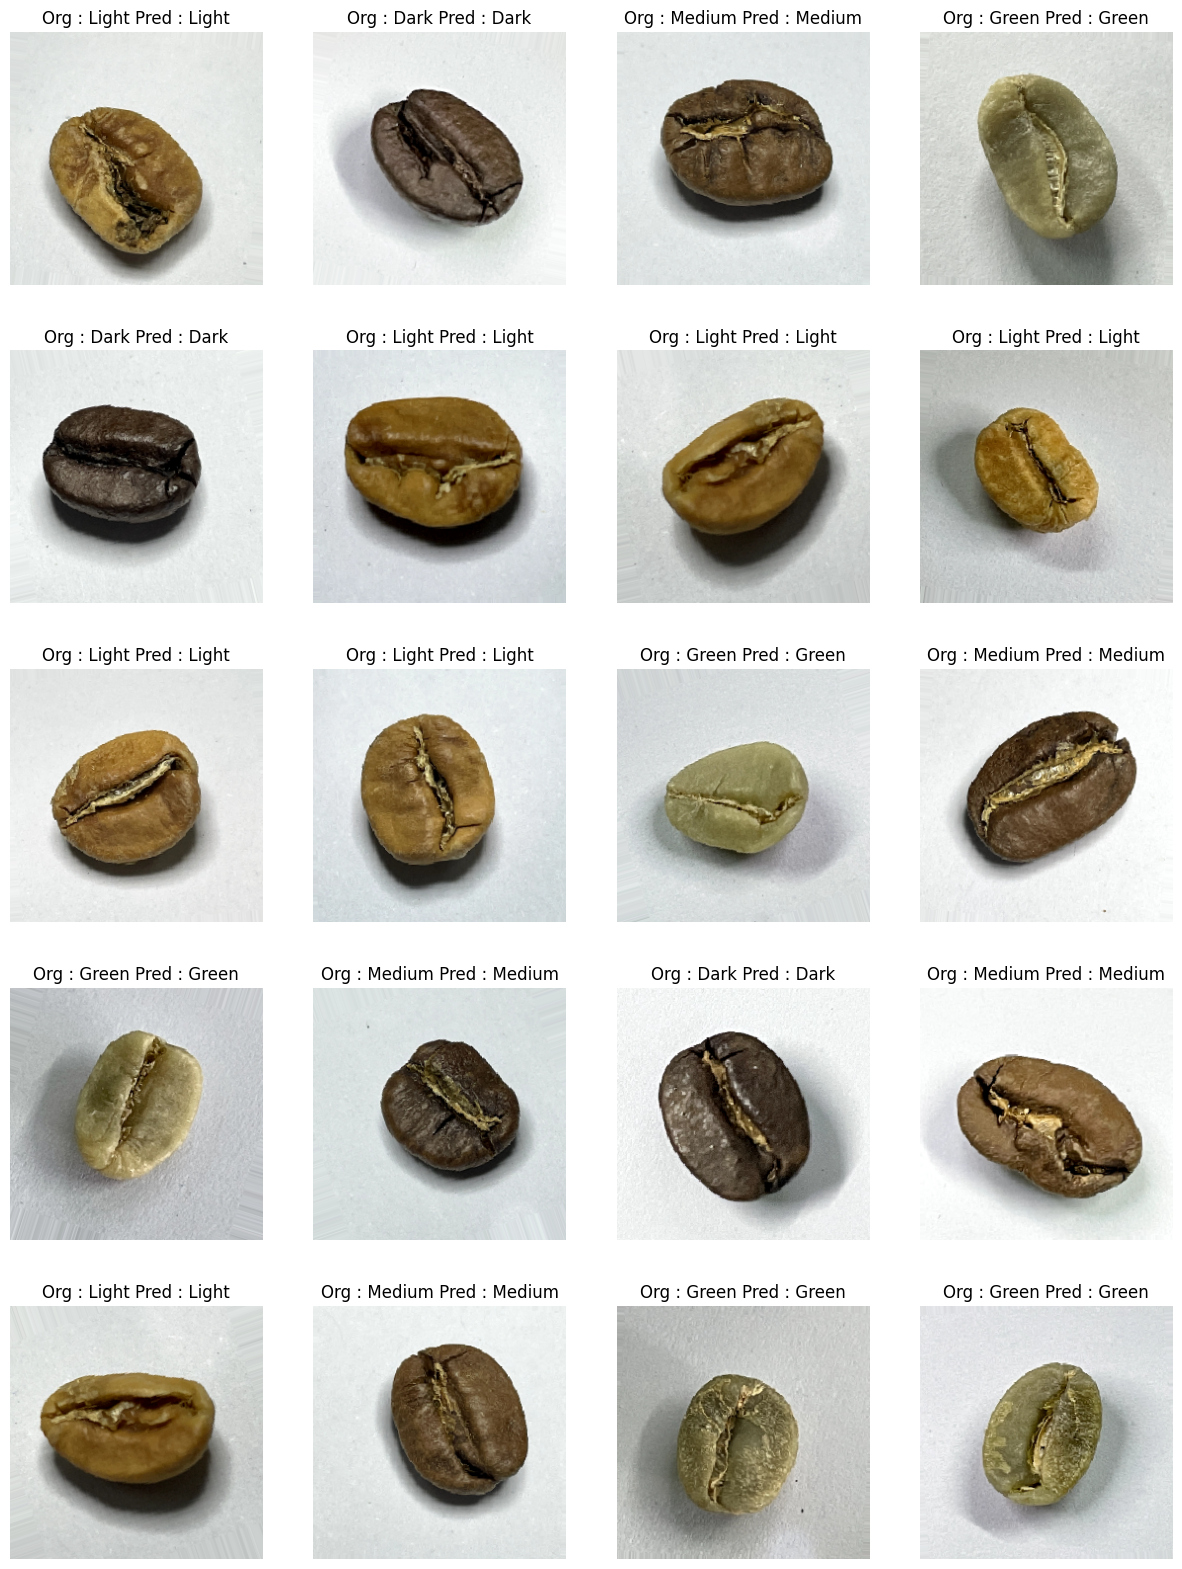

In [25]:
plt.figure(figsize=(15,20))
i=1
for images, labels in iter(test_ds):
    
    # Load Random Image, label
    id = np.random.randint(len(images))
    image = images[id]
    label = labels[id]

    # Make Prediction
    pred_label = class_names[int(np.argmax(model.predict(image[np.newaxis,...])))]

    # Plot Prediction
    plt.subplot(5,4,i)
    show_image(image, title=f"Org : {class_names[int(label)]} Pred : {pred_label}")

    # Increment and Break
    i+=1
    if i>=21: break

# Show
plt.show()